# Descriptors

In [115]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
import numpy as np

In [116]:
data = pd.read_csv("data/chembl_Vasopressin_V1a_receptor_KI.csv", delimiter = ";")

In [117]:
data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL1085301,NaN,0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN
1,CHEMBL1084008,NaN,0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN
2,CHEMBL4173250,NaN,0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4138154,1,Scientific Literature,Eur J Med Chem,2018.0,None,NaN
3,CHEMBL382301,ATOSIBAN,4,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1142309,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2008.0,None,NaN
4,CHEMBL1085299,NaN,0,377.53,1,5.71,12k,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN


In [118]:
data["Smiles"]

0       COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...
1       COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...
2       Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...
3       CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...
4       COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...
                              ...                        
1712               O=S(=O)(Nc1ccnn1-c1ccccn1)c1ccc(Cl)cc1
1713    CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...
1714    CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...
1715    COc1ccc(S(=O)(=O)N2c3ccc(Cl)cc3[C@](O)(c3ccccc...
1716    CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...
Name: Smiles, Length: 1717, dtype: object

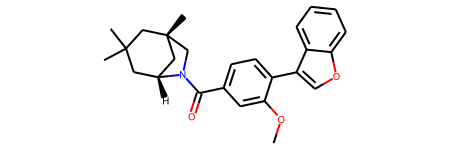

In [119]:
Chem.MolFromSmiles(data.loc[0, 'Smiles'])

In [120]:
smiles = data["Smiles"]
smiles.fillna("", inplace = True)

In [121]:
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]

In [122]:
molecules[:5]

In [123]:
data["rdkit"] = molecules

In [124]:
data["molecular_weight"] = data["rdkit"].apply(Descriptors.MolWt)

In [125]:
data["mol_logP"] = data["rdkit"].apply(Descriptors.MolLogP)

In [126]:
data["numh_acceptors"] = data["rdkit"].apply(Descriptors.NumHAcceptors)

In [127]:
data["numh_donors"] = data["rdkit"].apply(Descriptors.NumHDonors)

array([[<AxesSubplot:title={'center':'molecular_weight'}>,
        <AxesSubplot:title={'center':'mol_logP'}>],
       [<AxesSubplot:title={'center':'numh_acceptors'}>,
        <AxesSubplot:title={'center':'numh_donors'}>]], dtype=object)

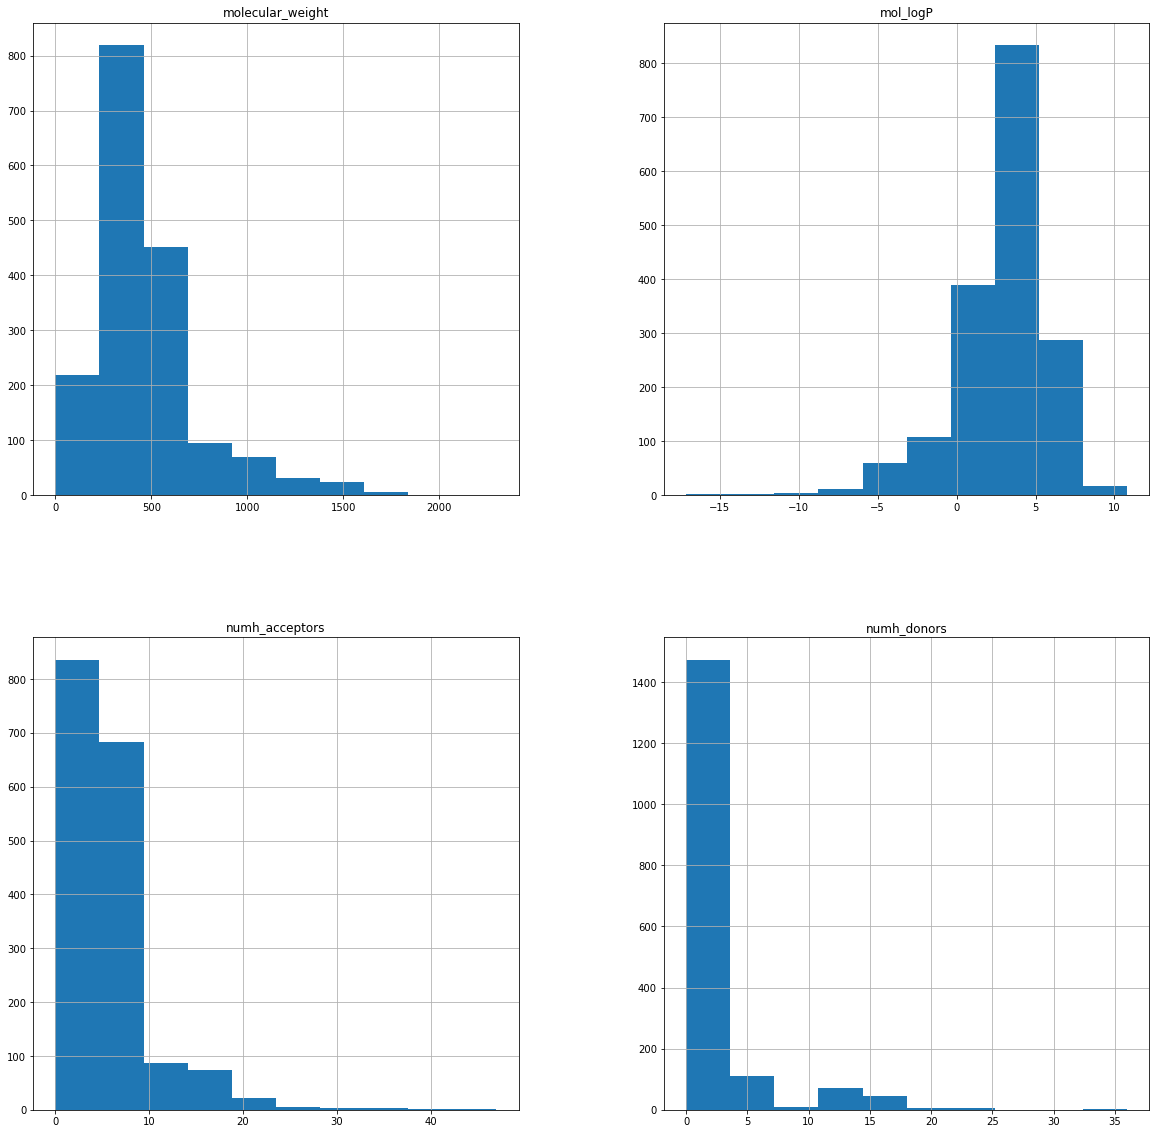

In [128]:
data[["molecular_weight", "mol_logP", "numh_acceptors", "numh_donors"]].hist(figsize=(20,20))

## Lipinsky filter

In [130]:
data["lipinsky_rule"] = sum([(data["molecular_weight"] < 500), (data["mol_logP"] <= 5), (data["numh_acceptors"] <= 10), (data["numh_donors"] <= 5)]).gt(2)

In [131]:
data.head(10)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,rdkit,molecular_weight,mol_logP,numh_acceptors,numh_donors,lipinsky_rule
0,CHEMBL1085301,NaN,0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec66d2530>,403.522,6.14920,3,0,True
1,CHEMBL1084008,NaN,0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899f260>,402.538,5.88430,2,1,True
2,CHEMBL4173250,NaN,0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...,Ki,'=',...,Eur J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899f530>,524.625,3.98640,8,3,True
3,CHEMBL382301,ATOSIBAN,4,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...,Ki,'=',...,Bioorg. Med. Chem. Lett.,2008.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899f5d0>,994.208,-3.04460,15,11,False
4,CHEMBL1085299,NaN,0,377.53,1,5.71,12k,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899fa80>,377.528,5.71142,2,0,True
5,CHEMBL315232,NaN,0,452.60,1,6.07,39,Cc1nnc(-c2ccc(-c3ccccc3)cc2)n1-c1ccccc1OCCCC1C...,Ki,'=',...,J. Med. Chem.,2002.0,CHEMBL3308072,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899f940>,452.602,6.06832,5,1,True
6,CHEMBL432043,NaN,0,568.07,2,6.13,24,COc1cccc(-c2ccccc2C(=O)Nc2ccc(C(=O)N3C[C@H]4CO...,Ki,NaN,...,Bioorg. Med. Chem. Lett.,2004.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899fb20>,568.073,6.12910,5,1,False
7,CHEMBL143304,NaN,0,451.52,0,3.35,3,CC(=O)NCCCOc1ccc(C(=O)N2CCC(N3C(=O)OCc4ccccc43...,Ki,'=',...,J. Med. Chem.,1995.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899fbc0>,451.523,3.35300,5,1,True
8,CHEMBL590097,NaN,0,395.46,0,2.78,14,COCc1nnc(N2CC[C@@H](Oc3ccccc3C)C2)n1-c1ccc(OC)nc1,Ki,'=',...,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899fc10>,395.463,2.78342,8,0,True
9,CHEMBL592733,NaN,0,395.46,0,2.78,17,COCc1nnc(N2CC[C@H](Oc3ccccc3C)C2)n1-c1ccc(OC)nc1,Ki,'=',...,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fcec899fd50>,395.463,2.78342,8,0,True


In [135]:
data["lipinsky_rule"].sum() / len(data.index)

0.7891671520093185